# Data source https://webs.iiitd.edu.in/raghava/egfrindb/downloadfiles.php

## Assumption that target values are the IC50s

In [1]:
EGFR = open("egfr.txt", "r")
EGFR_ = EGFR.readlines()[1:]

In [2]:
EGFR_[0:5]

['EGIN0000001\t0.008 ± 0.0013 µM\t21306821\tCancer Letters\t302 (2011) 155–165\tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0000001\t0.5 nM\t22888144\tJ Pharmacol Exp Ther\t 2012 Aug 10. \tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0000001\t0.5 nM \t16475937\tCurr Med Chem. \t2006;13(3):277-87.\tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0000001\t11 nM\t20550212\tJournal of Medicinal Chemistry\t2010, 53, 4980–4988\tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0000001\t8.0nM\t21732342\tInt J Cancer.\t130, 2445–2454 (2012) \tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n']

In [3]:
smiles = EGFR_[0].split('\t')

In [4]:
smiles[5]

'CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n'

In [5]:
from rdkit import Chem

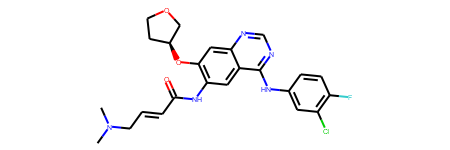

In [6]:
Chem.MolFromSmiles(smiles[5])

In [7]:
SMILES_ = [initials.split('\t')[5] for initials in EGFR_]

In [8]:
for i in range(len(SMILES_)):
    try:
        Chem.MolFromSmiles(SMILES_[i])
    except:
        print(SMILES_[i])

In [9]:
target_ = EGFR_[0].split('\t')

In [10]:
target_

['EGIN0000001',
 '0.008 ± 0.0013 µM',
 '21306821',
 'Cancer Letters',
 '302 (2011) 155–165',
 'CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n']

In [11]:
target_[1]

'0.008 ± 0.0013 µM'

In [12]:
target_ = [initials.split('\t')[1] for initials in EGFR_]

In [13]:
target_[0:5]

['0.008 ± 0.0013 µM', '0.5 nM', '0.5 nM ', '11 nM', '8.0nM']

In [14]:
import pandas as pd
first_db = pd.DataFrame(data=SMILES_, columns=['SMILES'])

In [15]:
first_db.head()

,SMILES
0,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...
1,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...
2,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...
3,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...
4,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...


In [16]:
SMILES_[0:5]

['CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n']

In [17]:
first_db['potential target'] = target_

In [18]:
first_db.head()

,SMILES,potential target
0,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.008 ± 0.0013 µM
1,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.5 nM
2,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.5 nM
3,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,11 nM
4,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,8.0nM


In [19]:
first_db.shape

(3981, 2)

## duplicates are present.... from different experimet

In [20]:
SEC_EGFR = open("her2.txt", "r")
SEC_EGFR_ = SEC_EGFR.readlines()[1:]

In [21]:
SEC_EGFR_[0:5]

['EGIN0000001\t0.0249 ± 0.0031 µM\t21306821\tCancer Letters\t302 (2011) 155–165\tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0000001\t14 nM\t22888144\tJ Pharmacol Exp Ther\t 2012 Aug 10. \tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0000001\t14 nM  \t16475937\tCurr Med Chem. \t2006;13(3):277-87.\tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0000001\t24.9nM\t21732342\tInt J Cancer.\t130, 2445–2454 (2012) \tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0000002\t>1000 nM\t19888761\tJ. Med. Chem\t2009, 52, 6880–6888\tc12cc(c(cc1ncnc2Nc1cc(ccc1)C#C)OCCOC)OCCOC\n']

In [22]:
SMILES_ = [initials.split('\t')[5] for initials in SEC_EGFR_]

In [23]:
target_ = [initials.split('\t')[1] for initials in SEC_EGFR_]

In [24]:
second_db = pd.DataFrame(data=SMILES_, columns=['SMILES'])
second_db['potential target'] = target_

In [25]:
second_db.shape

(1243, 2)

In [26]:
THI_EGFR = open("her4.txt", "r")
THI_EGFR_ = THI_EGFR.readlines()[1:]

In [27]:
THI_EGFR_[0:5]

['EGIN0000208\t0.0023 µM \t18667312\tBioorg Med Chem Lett.\t2008 November 15; 18(22): 5916–5919\tc12c(ccc(c1)NC(=O)C=C)ncnc2Nc1cc(ccc1)Br\n',
 'EGIN0000006\t0.014 µM  \t18667312\tBioorg Med Chem Lett.\t2008 November 15; 18(22): 5916–5919\tc12c(cc(c(c1)NC(=O)C=C)OCCCN1CCOCC1)ncnc2Nc1cc(c(cc1)F)Cl\n',
 'EGIN0004795\t0.02 µM\t11378364\tBioorganic & Medicinal Chemistry Letters\t11 (2001) 1401–1405\tc1c(ncc2c1c(ncn2)Nc1ccc2n(ncc2c1)Cc1ccccc1)N(C)C\n',
 'EGIN0000001\t0.0266 ± 0.0016 µM\t21306821\tCancer Letters\t302 (2011) 155–165\tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0004275\t<0.1 µM\t19888761\tJ. Med. Chem\t2009, 52, 6880–6888\tc1(c(cc2c(c1)c(ncn2)Nc1c(c(ccc1)Cl)F)OCCOC)NC(=O)[C@@H]1CCCN1C(=O)C=C\n']

In [28]:
SMILES_ = [initials.split('\t')[5] for initials in THI_EGFR_]

In [29]:
target_ = [initials.split('\t')[1] for initials in THI_EGFR_]

In [30]:
third_db = pd.DataFrame(data=SMILES_, columns=['SMILES'])
third_db['potential target'] = target_

In [31]:
third_db.shape

(62, 2)

In [32]:
FOU_EGFR = open("l858r.txt", "r")
FOU_EGFR_ = FOU_EGFR.readlines()[1:]

In [33]:
FOU_EGFR_[0:5]

['EGIN0000002\t0.1 ± 0.005nM\t20222733\tJ. Med. Chem\t2010, 53, 2892–2901\tc12cc(c(cc1ncnc2Nc1cc(ccc1)C#C)OCCOC)OCCOC\n',
 'EGIN0000001\t0.2  nM\t22888144\tJ Pharmacol Exp Ther\t 2012 Aug 10. \tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0004548\t0.38 nM\t22339342\tJ. Med. Chem. \t2012, 55, 2711-2723\tc1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)Cc1ccccc1)c1cccc(c1)NC(=O)C=C)N1CCN(CC1)C\n',
 'EGIN0000646\t0.4 ± 0.6 nM\t20222733\tJ. Med. Chem\t2010, 53, 2892–2901\tc1(ccc2c(c1)c(ncn2)Nc1cc(ccc1)Br)NC(=O)CC\n',
 'EGIN0004553\t0.45 nM\t22339342\tJ. Med. Chem. \t2012, 55, 2711-2723\tc1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)CCC)c1cccc(c1)NC(=O)C=C)N1CCN(CC1)C\n']

In [34]:
SMILES_ = [initials.split('\t')[5] for initials in FOU_EGFR_]

In [35]:
target_ = [initials.split('\t')[1] for initials in FOU_EGFR_]

In [36]:
fourth_db = pd.DataFrame(data=SMILES_, columns=['SMILES'])
fourth_db['potential target'] = target_

In [37]:
fourth_db.shape

(98, 2)

In [38]:
FIF_EGFR = open("t790m.txt", "r")
FIF_EGFR_ = FIF_EGFR.readlines()[1:]

In [39]:
FIF_EGFR_[0:5]

['EGIN0000001\t10 nM  \t16475937\tCurr Med Chem. \t2006;13(3):277-87.\tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0000001\t9.8 nM\t21732342\tInt J Cancer.\t130, 2445–2454 (2012) \tCN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc1)F)Cl)O[C@H]1CCOC1\n',
 'EGIN0000002\t>1000 nM\t21732342\tInt. J. Cancer\t130, 2445–2454 (2012) \tc12cc(c(cc1ncnc2Nc1cc(ccc1)C#C)OCCOC)OCCOC\n',
 'EGIN0000002\t260 nM\t18316192\tBioorganic & Medicinal Chemistry\t16 (2008) 3482–3488\tc12cc(c(cc1ncnc2Nc1cc(ccc1)C#C)OCCOC)OCCOC\n',
 'EGIN0000003\t>1000 nM\t21732342\tInt. J. Cancer\t130, 2445–2454 (2012) \tCS(=O)(=O)CCNCc1ccc(o1)c1cc2c(cc1)ncnc2Nc1cc(c(cc1)OCc1cc(ccc1)F)Cl\n']

In [40]:
SMILES_ = [initials.split('\t')[5] for initials in FIF_EGFR_]

In [41]:
target_ = [initials.split('\t')[1] for initials in FIF_EGFR_]

In [42]:
fifth_db = pd.DataFrame(data=SMILES_, columns=['SMILES'])
fifth_db['potential target'] = target_

In [43]:
fifth_db.shape

(39, 2)

In [44]:
frames =(first_db, second_db, third_db, fourth_db, fifth_db)

In [45]:
concat = pd.concat(frames,axis=0)

In [46]:
concat

,SMILES,potential target
0,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.008 ± 0.0013 µM
1,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.5 nM
2,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.5 nM
3,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,11 nM
4,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,8.0nM
...,...,...
34,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,60.31 nM
35,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,95.71 nM
36,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,24.90 nM
37,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,6.56 nM


In [47]:
concat.describe() #in reference material 4451 structures are mentioned...

,SMILES,potential target
count,5423,5423
unique,3702,3235
top,c12cc(c(cc1ncnc2Nc1cc(ccc1)C#C)OCCOC)OCCOC\n,>100 µM
freq,48,96


In [48]:
concat = concat.reset_index()

In [49]:
concat

,index,SMILES,potential target
0,0,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.008 ± 0.0013 µM
1,1,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.5 nM
2,2,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.5 nM
3,3,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,11 nM
4,4,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,8.0nM
...,...,...,...
5418,34,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,60.31 nM
5419,35,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,95.71 nM
5420,36,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,24.90 nM
5421,37,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,6.56 nM


## What should be the target data? IC50 value? Then what unit uM or nM? This is the current issue.

# Arbitral choose nM

In [50]:
len(concat)

5423

In [51]:
len(concat['potential target'])

5423

In [52]:
concat['UNIT'] = concat['potential target']
#concat['target'] = concat['potential target']

In [53]:
for x, string in enumerate(concat['potential target']):
    
    newstring = ''.join((char if char in 'nMµmp' else ' ') for char in string)
    unit = newstring.strip()
    #res = unit
    concat['UNIT'][x] = unit

<ipython-input-53-57370ffe7eb8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat['UNIT'][x] = unit


In [54]:
concat['UNIT'].describe()

count     5423
unique       8
top         µM
freq      3603
Name: UNIT, dtype: object

In [55]:
concat['UNIT'].unique() #can be used as filtration

array(['µM', 'nM', 'pM', 'µ  m', '', 'M', 'm n', 'm'], dtype=object)

In [56]:
concat['UNIT']

0       µM
1       nM
2       nM
3       nM
4       nM
        ..
5418    nM
5419    nM
5420    nM
5421    nM
5422    nM
Name: UNIT, Length: 5423, dtype: object

In [57]:
value = concat['potential target'][0]

In [58]:
value

'0.008 ± 0.0013 µM'

In [59]:
concat

,index,SMILES,potential target,UNIT
0,0,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.008 ± 0.0013 µM,µM
1,1,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.5 nM,nM
2,2,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.5 nM,nM
3,3,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,11 nM,nM
4,4,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,8.0nM,nM
...,...,...,...,...
5418,34,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,60.31 nM,nM
5419,35,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,95.71 nM,nM
5420,36,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,24.90 nM,nM
5421,37,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,6.56 nM,nM


In [60]:
concat.to_csv('test.csv')

In [61]:
concat['value'] = concat['potential target']
for x, string in enumerate(concat['potential target']):
    newstring = ''.join((char if char in '0123456789.-e' else ' ') for char in str(string))
    newstring_ = newstring.split(" ")
    if len(newstring_) > 1:
        try:
            
            Number = float(newstring_[0])  #[float(i) for i in newstring.split()]
        except:
            print(x, ':', newstring_)
    #elif len(newstring_) > 2:
        try:
            Number = float(newstring_[1])
        except:
            print(x, ':', newstring_)
    elif len(newstring_) == 1:
        try:
            Number = float(newstring_)
        except:
            print(x, ":", newstring_)
    else:
        Number = 0
    #num = Number[0]
    if float(Number) > 0:
        
        res = float(Number)
        concat['value'][x] = res
    else:
        pass

0 : ['0.008', '', '', '0.0013', '', '', '']
1 : ['0.5', '', '', '']
2 : ['0.5', '', '', '', '']
3 : ['11', '', '', '']
4 : ['8.0', '', '']
5 : ['0.03', '', '', '0.001', '', '', '']
6 : ['', '1000', '', '', '']
7 : ['', '1000', '', '']
8 : ['0.001', '', '', '']
9 : ['0.0014', '', '', '']
10 : ['0.015', '', '', '']
11 : ['0.017', '', '', '-', '0.010', '', '', '', '', '', '']
12 : ['0.02', '', '', '']
13 : ['0.02', '', '', '']
14 : ['0.0203', '', '', '', '']
15 : ['0.03', '', '', '0.002', '', '', '']
16 : ['0.03', '', '', '']
17 : ['0.03', '', '', '']
18 : ['0.03', '', '', '']
19 : ['0.03', '', '', '']
20 : ['0.03', '', '']
21 : ['0.2', '', '', '0.05', '', '', '']
22 : ['1.0', '', '', '']
23 : ['1.2', '', '', '0.2', '', '']
24 : ['1.45', '', '']
25 : ['10', '', '', '']
26 : ['2', '', '', '']
27 : ['2', '', '', '']
28 : ['20.3', '', '', '1.02', '', '', '', '']
29 : ['3.10', '', '', '']
30 : ['3.6', '', '', '']
31 : ['3.69', '', '', '']
32 : ['48.0', '', '', '']
33 : ['0.008', '', '', '', '

<ipython-input-61-1947786b1f21>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat['value'][x] = res


 : ['27', '', '', '', '', '', '', '', '', '', '', '', '', '']
315 : ['', '100000', '', '', '', '', '', '']
316 : ['', '100000', '', '', '']
317 : ['5500', '', '', '', '', '', '']
318 : ['5500', '', '', '', '', '', '', '']
319 : ['5500', '', '', '', '', '', '', '', '', '', '']
320 : ['0.006', '', '', '', '', '']
321 : ['0.006', '', '', '', '', '', '', '', '', '', '']
322 : ['0.41', '', '', '0.09', '', '', '']
323 : ['', '10000', '', '', '', '']
324 : ['', '10000', '', '', '', '']
325 : ['974', '', '', '', '', '', '', '', '']
326 : ['0.44', '', '', '']
327 : ['0.44', '', '', '', '', '', '']
328 : ['0.44', '', '', '', '', '', '', '', '', '', '']
329 : ['0.37', '', '', '']
330 : ['12', '', '', '']
331 : ['40', '', '', '']
332 : ['3.7', '', '', '']
333 : ['53', '', '', '', '', '', '', '', '', '', '', '']
334 : ['0.39', '', '', '', '', '', '', '', '', '', '']
335 : ['0.44', '', '', '']
336 : ['0.44', '', '', '', '', '', '']
337 : ['0.80', '', '', '']
338 : ['1.6', '', '', '']
339 : ['41', ''

659 : ['3.1', '', '', '', '', '', '', '', '', '']
660 : ['2030', '', '', '', '', '', '', '', '']
661 : ['51', '', '', '', '', '', '', '', '', '', '']
662 : ['0.13', '', '', '', '', '', '', '', '']
663 : ['40', '', '', '', '', '', '', '', '', '', '']
664 : ['124', '', '', '', '', '', '', '', '', '']
665 : ['0.008', '', '', '', '', '', '', '']
666 : ['0.006', '', '', '', '', '', '', '']
667 : ['2.6', '', '', '', '', '', '', '', '', '']
668 : ['2.3', '', '', '', '', '', '', '', '', '']
669 : ['9.0', '', '', '', '', '', '', '', '', '']
670 : ['', '104', '', '', '', '', '', '', '', '']
671 : ['688', '', '', '', '', '', '', '', '', '']
672 : ['940', '', '', '', '', '', '', '', '', '']
673 : ['684', '', '', '', '', '', '', '', '', '']
674 : ['52', '', '', '', '', '', '', '', '', '', '']
675 : ['324', '', '', '', '', '', '', '', '', '']
676 : ['603', '', '', '', '', '', '', '', '', '']
677 : ['34', '', '', '', '', '', '', '', '', '', '']
678 : ['7.6', '', '', '', '', '', '', '', '', '']
679 : 

997 : ['0.046', '', '', '']
998 : ['0.42', '', '', '']
999 : ['0.86', '', '', '']
1000 : ['0.36', '', '', '']
1001 : ['25.7', '', '', '']
1002 : ['0.11', '', '', '']
1003 : ['', '50', '', '', '']
1004 : ['0.006', '', '', '']
1005 : ['', '100', '', '', '']
1006 : ['6.92', '', '', '']
1007 : ['0.006', '', '', '']
1008 : ['0.012', '', '', '']
1009 : ['0.062', '', '', '']
1010 : ['0.085', '', '', '']
1011 : ['0.097', '', '', '']
1012 : ['0.071', '', '', '']
1013 : ['0.057', '', '', '']
1014 : ['0.02', '', '', '']
1015 : ['0.095', '', '', '']
1016 : ['0.065', '', '', '']
1017 : ['0.065', '', '', '']
1018 : ['0.009', '', '', '']
1019 : ['0.065', '', '', '']
1020 : ['0.059', '', '', '']
1021 : ['0.002', '', '', '']
1022 : ['0.011', '', '', '']
1023 : ['0.22', '', '', '', '']
1024 : ['0.41', '', '', '0.39', '', '', '']
1025 : ['0.46', '', '', '0.12', '', '', '', '', '']
1026 : ['0.073', '', '', '']
1027 : ['0.09', '', '', '']
1028 : ['0.106', '', '', '']
1029 : ['0.074', '', '', '']
1030 : ['0

1347 : ['304', '', '', '', '', '', '']
1348 : ['115', '', '', '', '', '', '']
1349 : ['68', '', '', '', '', '', '', '']
1350 : ['121', '', '', '', '', '', '']
1351 : ['138', '', '', '', '', '', '']
1352 : ['0.1', '', '', '']
1353 : ['0.21', '', '', '']
1354 : ['0.25', '', '', '']
1355 : ['0.086', '', '', '']
1356 : ['0.2', '', '', '']
1357 : ['1.8', '', '', '']
1358 : ['0.081', '', '', '']
1359 : ['0.12', '', '', '']
1360 : ['0.34', '', '', '']
1361 : ['0.49', '', '', '']
1362 : ['0.03', '', '', '']
1363 : ['0.46', '', '', '']
1364 : ['0.14', '', '', '']
1365 : ['0.09', '', '', '']
1366 : ['0.064', '', '', '']
1367 : ['0.16', '', '', '']
1368 : ['0.62', '', '', '']
1369 : ['0.073', '', '', '']
1370 : ['0.13', '', '', '']
1371 : ['0.19', '', '', '']
1372 : ['0.083', '', '', '']
1373 : ['0.64', '', '', '']
1374 : ['0.21', '', '', '']
1375 : ['0.5', '', '', '']
1376 : ['0.81', '', '', '']
1377 : ['0.12', '', '', '']
1378 : ['0.69', '', '', '']
1379 : ['0.068', '', '', '']
1380 : ['0.4', '

1652 : ['0.003', '', '', '']
1653 : ['0.003', '', '', '']
1654 : ['0.009', '', '', '']
1655 : ['0.004', '', '', '']
1656 : ['0.002', '', '', '']
1657 : ['0.03', '', '', '']
1658 : ['0.14', '', '', '']
1659 : ['0.25', '', '', '']
1660 : ['0.5', '', '', '']
1661 : ['0.657', '', '', '']
1662 : ['1', '', '', '']
1663 : ['1.25', '', '', '']
1664 : ['0.2', '', '', '']
1665 : ['0.2', '', '', '']
1666 : ['0.2', '', '']
1667 : ['0.217', '', '', '']
1668 : ['189', '', '', '18', '', '', '', '', '']
1669 : ['200', '', '', '']
1670 : ['0.0112', '', '', '']
1671 : ['0.026', '', '', '']
1672 : ['', '10', '', '', '']
1673 : ['0.2', '', '', '']
1674 : ['0.032', '', '', '']
1675 : ['0.05', '', '', '']
1676 : ['5.01', '', '', '']
1677 : ['0.059', '', '0.003', '', '', '', '']
1678 : ['0.005', '', '0.003', '', '', '', '']
1679 : ['0.005', '', '0.002', '', '', '', '']
1680 : ['1.8', '', '0.25', '', '', '', '', '']
1681 : ['2.4', '', '0.41', '', '', '', '', '']
1682 : ['0.14', '', '0.048', '', '', '', '', ''

2235 : ['', '', '10', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2235 : ['', '', '10', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2236 : ['', '50', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2237 : ['', '', '5', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2237 : ['', '', '5', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2238 : ['', '5', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2239 : ['', '', '10', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2239 : ['', '', '10', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2240 : ['', '', '20', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2240 : ['', '', '20', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2241 : ['', '', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2241 : ['', '', '1', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
2242 : ['', '', '1', '', '', '', '', '', '', '', '', '', 

2531 : ['3', '', '', '', '']
2532 : ['0.09', '', '', '', '']
2533 : ['5', '', '', '', '']
2534 : ['0.11', '', '', '', '']
2535 : ['0.09', '', '', '', '']
2536 : ['', '100', '', '', '', '']
2537 : ['', '100', '', '', '', '']
2538 : ['1-3']
2539 : ['0.3', '', '', '', '']
2540 : ['0.84', '', '', '']
2541 : ['1-3']
2542 : ['0.7', '', '', '', '']
2543 : ['0.7', '', '', '', '']
2544 : ['2.5', '', '', '', '']
2545 : ['', '50', '', '', '', '']
2546 : ['2.5', '', '', '', '']
2547 : ['50', '', '', '', '']
2548 : ['', '50', '', '', '', '']
2549 : ['', '100', '', '', '', '']
2550 : ['', '50', '', '', '', '']
2551 : ['2', '', '', '', '']
2552 : ['', '100', '', '', '', '']
2553 : ['8.7', '', '', '', '']
2554 : ['', '50', '', '', '', '']
2555 : ['', '50', '', '', '', '']
2556 : ['', '100', '', '', '', '']
2557 : ['', '50', '', '', '', '']
2558 : ['', '50', '', '', '', '']
2559 : ['', '100', '', '', '', '']
2560 : ['', '100', '', '', '']
2561 : ['', '100', '', '', '', '']
2562 : ['', '50', '', '', '',

2813 : ['0.17', '', '', '', '']
2814 : ['0.5', '', '', '', '']
2815 : ['2.54', '', '', '', '']
2816 : ['1.47', '', '', '', '']
2817 : ['0.35', '', '', '', '']
2818 : ['0.75', '', '', '', '']
2819 : ['0.9', '', '', '', '']
2820 : ['0.295', '', '', '', '']
2821 : ['0.31', '', '', '', '']
2822 : ['0.93', '', '', '', '']
2823 : ['0.797', '', '', '', '']
2824 : ['0.5', '', '', '']
2825 : ['31', '', '', '']
2826 : ['0.5', '', '', '']
2827 : ['0.7', '', '', '']
2828 : ['0.35', '', '', '']
2829 : ['2.65', '', '', '']
2830 : ['1.3', '', '', '']
2831 : ['1.1', '', '', '']
2832 : ['0.6', '', '', '']
2833 : ['0.7', '', '', '']
2834 : ['0.8', '', '', '']
2835 : ['6.4', '', '', '']
2836 : ['1.4', '', '', '']
2837 : ['3.4', '', '', '']
2838 : ['0.3', '', '', '']
2839 : ['0.8', '', '', '']
2840 : ['0.3', '', '', '']
2841 : ['', '10000', '', '', '']
2842 : ['5100', '', '', '']
2843 : ['1704', '', '', '']
2844 : ['', '10000', '', '', '']
2845 : ['', '100', '', '', '']
2846 : ['', '100', '', '', '']
2847

3332 : ['', '200', '', '', '']
3333 : ['', '200', '', '', '']
3334 : ['', '200', '', '', '']
3335 : ['95', '', '', '']
3336 : ['', '200', '', '', '']
3337 : ['100', '', '', '']
3338 : ['', '200', '', '', '']
3339 : ['59', '', '', '']
3340 : ['', '200', '', '', '']
3341 : ['', '200', '', '', '']
3342 : ['', '200', '', '', '']
3343 : ['180', '', '', '']
3344 : ['', '200', '', '', '']
3345 : ['90', '', '', '']
3346 : ['', '200', '', '', '']
3347 : ['0.4', '', '', '']
3348 : ['0.1', '', '', '']
3349 : ['0.075', '', '', '']
3350 : ['0.1', '', '', '']
3351 : ['0.2', '', '', '']
3352 : ['0.1', '', '', '']
3353 : ['0.4', '', '', '']
3354 : ['0.1', '', '', '']
3355 : ['0.09', '', '', '']
3356 : ['0.1', '', '', '']
3357 : ['0.8', '', '', '']
3358 : ['0.3', '', '', '']
3359 : ['0.3', '', '', '']
3360 : ['1', '', '', '']
3361 : ['0.1', '', '', '']
3362 : ['0.3', '', '', '']
3363 : ['0.45', '', '', '']
3364 : ['0.3', '', '', '']
3365 : ['0.3', '', '', '']
3366 : ['0.5', '', '', '']
3367 : ['0.5', '

3633 : ['3.49', '', '', '0.32', '', '', '']
3634 : ['1.16', '', '', '0.12', '', '', '']
3635 : ['0.24', '', '', '0.04', '', '', '']
3636 : ['1.66', '', '', '0.18', '', '', '']
3637 : ['2.01', '', '', '0.22', '', '', '']
3638 : ['1.08', '', '', '0.13', '', '', '']
3639 : ['7.96', '', '', '0.82', '', '', '']
3640 : ['5.58', '', '', '0.52', '', '', '']
3641 : ['2.03', '', '', '0.21', '', '', '']
3642 : ['4.12', '', '', '0.45', '', '', '']
3643 : ['6.48', '', '', '0.70', '', '', '']
3644 : ['4.86', '', '', '0.50', '', '', '']
3645 : ['3.20', '', '', '0.35', '', '', '']
3646 : ['8.58', '', '', '0.84', '', '', '']
3647 : ['6.67', '', '', '0.72', '', '', '']
3648 : ['2.28', '', '', '0.24', '', '', '']
3649 : ['8.16', '', '', '0.86', '', '', '']
3650 : ['14.21', '', '', '1.41', '', '', '']
3651 : ['5.34', '', '', '0.55', '', '', '']
3652 : ['10.69', '', '', '1.12', '', '', '']
3653 : ['8.36', '', '', '0.85', '', '', '']
3654 : ['4.79', '', '', '0.51', '', '', '']
3655 : ['3.38', '', '', '0.34'

4000 : ['', '36', '', '', '']
4001 : ['0.003', '', '', '']
4002 : ['0.0045', '', '', '']
4003 : ['0.009', '', '', '', '', '']
4004 : ['0.009', '', '', '']
4005 : ['0.009', '', '', '', '', '', '', '']
4006 : ['0.010', '', '', '']
4007 : ['10.2', '', '', '']
4008 : ['15', '', '', '', '', '']
4009 : ['350', '', '', '', '']
4010 : ['36.3', '', '']
4011 : ['36.3', '', '']
4012 : ['60.0', '', '', '']
4013 : ['9', '', '', '', '']
4014 : ['', '10', '', '', '']
4015 : ['0.24', '', '', '', '']
4016 : ['1.1', '', '', '', '', '', '', '']
4017 : ['1.604', '', '', '']
4018 : ['1830', '', '', '']
4019 : ['240', '', '', '', '']
4021 : ['0.0084', '', '', '', '']
4022 : ['0.048', '', '', '']
4023 : ['0.529', '', '', '']
4024 : ['127', '', '', '42', '', '', '']
4025 : ['20', '', '', '', '', '', '', '']
4026 : ['30', '', '', '', '', '']
4027 : ['143', '', '', '52', '', '']
4028 : ['0.024', '', '', '']
4029 : ['0.114', '', '', '', '', '', '', '']
4030 : ['215', '', '', '87', '', '', '']
4031 : ['1.9', '', 

4308 : ['17', '', '', '', '']
4309 : ['19', '', '', '3', '', '', '', '', '', '', '', '', '', '', '', '']
4310 : ['0.13', '', '', '0.007', '', '', '', '', '', '']
4311 : ['0.13', '', '', '']
4312 : ['0.45', '', '', '0.07', '', '', '', '', '', '', '']
4313 : ['0.45', '', '', '']
4314 : ['1.65', '', '', '0.19', '', '', '', '', '', '', '']
4315 : ['1.65', '', '', '']
4316 : ['0.2', '', '', '0.03', '', '', '', '', '', '', '', '']
4317 : ['0.20', '', '', '']
4318 : ['0.35', '', '', '0.07', '', '', '', '', '', '', '']
4319 : ['0.35', '', '', '']
4320 : ['15', '', '', '', '', '', '']
4321 : ['1.5', '', '', '', '']
4322 : ['6.1', '', '', '0.1', '', '', '', '', '', '', '', '', '']
4323 : ['0.776', '', '', '', '', '']
4324 : ['0.100', '', '', '', '', '']
4325 : ['1.53', '', '', '', '', '', '']
4326 : ['', '100', '', '', '', '', '', '']
4327 : ['10.0', '', '', '', '', '', '']
4328 : ['10.0', '', '', '', '', '', '']
4329 : ['', '100', '', '', '', '', '', '']
4330 : ['', '100', '', '', '', '', '', '

4578 : ['', '0.002', '', '', '']
4579 : ['1.1', '', '', '0.085', '', '', '']
4580 : ['0.024', '', '', '0.001', '', '', '']
4581 : ['', '0.002', '', '', '']
4582 : ['', '0.002', '', '', '']
4583 : ['', '0.002', '', '', '']
4584 : ['0.070', '', '', '0.014', '', '', '']
4585 : ['0.024', '', '', '0.010', '', '', '']
4586 : ['0.026', '', '', '']
4587 : ['0.031', '', '', '']
4588 : ['0.10', '', '', '']
4589 : ['0.36', '', '', '']
4590 : ['0.022', '', '', '']
4591 : ['0.025', '', '', '']
4592 : ['0.09', '', '', '']
4593 : ['0.20', '', '', '']
4594 : ['0.22', '', '', '']
4595 : ['0.026', '', '', '']
4596 : ['0.024', '', '', '']
4597 : ['0.030', '', '', '']
4598 : ['0.030', '', '', '']
4599 : ['0.026', '', '', '']
4600 : ['0.017', '', '', '']
4601 : ['0.028', '', '', '']
4602 : ['0.038', '', '', '']
4603 : ['0.02', '', '', '']
4604 : ['0.022', '', '', '']
4605 : ['0.141', '', '', '']
4606 : ['0.141', '', '', '']
4607 : ['0.018', '', '', '']
4608 : ['0.035', '', '', '']
4609 : ['0.023', '', '', 

4926 : ['0.269', '', '', '', '']
4927 : ['0.062', '', '', '', '']
4928 : ['0.064', '', '', '', '']
4929 : ['1.184', '', '', '', '']
4930 : ['0.020', '', '', '', '']
4931 : ['0.018', '', '', '', '']
4932 : ['0.076', '', '', '', '']
4933 : ['26', '', '', '', '']
4934 : ['0.103', '', '', '', '']
4935 : ['0.083', '', '', '', '']
4936 : ['13', '', '', '', '']
4937 : ['3.9', '', '', '', '']
4938 : ['1.1', '', '', '', '']
4939 : ['0.183', '', '', '', '']
4940 : ['0.027', '', '', '', '']
4941 : ['0.966', '', '', '', '']
4942 : ['0.028', '', '', '', '']
4943 : ['0.104', '', '', '', '']
4944 : ['0.171', '', '', '', '']
4945 : ['0.025', '', '', '', '']
4946 : ['0.169', '', '', '', '']
4947 : ['0.058', '', '', '', '']
4948 : ['0.412', '', '', '', '']
4949 : ['0.059', '', '', '', '']
4950 : ['0.029', '', '', '', '']
4951 : ['0.540', '', '', '', '']
4952 : ['0.040', '', '', '', '']
4953 : ['0.196', '', '', '', '']
4954 : ['0.603', '', '', '', '']
4955 : ['0.059', '', '', '', '']
4956 : ['0.069', '',

5228 : ['', '0.1', '', '', '']
5229 : ['', '0.1', '', '', '']
5230 : ['0.5', '', '', '', '', '', '']
5231 : ['0.8', '', '', '', '', '', '']
5232 : ['0.86', '', '', '0.3', '', '']
5233 : ['1', '', '', '']
5234 : ['1', '', '', '']
5235 : ['1.0', '', '', '', '', '', '']
5236 : ['1.0', '', '', '', '', '', '']
5237 : ['1.2', '', '', '', '', '', '']
5238 : ['1.7', '', '', '', '', '', '']
5239 : ['1.8', '', '', '', '', '', '']
5240 : ['', '10', '', '', '']
5241 : ['', '100', '', '', '', '', '', '']
5242 : ['', '10000', '', '', '', '', '']
5243 : ['', '1000', '', '']
5244 : ['', '1000', '', '', '', '']
5245 : ['', '1000', '', '', '', '']
5246 : ['11', '', '', '', '', '', '', '']
5247 : ['12', '', '', '', '', '', '', '']
5248 : ['13', '', '', '', '', '', '', '']
5249 : ['1349', '', '', '', '', '', '']
5250 : ['140', '', '', '']
5251 : ['16', '', '', '', '', '', '', '']
5252 : ['1718', '', '', '', '', '', '']
5253 : ['190', '', '', '', '', '']
5254 : ['2.4', '', '', '', '', '', '']
5255 : ['229'

In [62]:
concat

,index,SMILES,potential target,UNIT,value
0,0,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.008 ± 0.0013 µM,µM,0.008
1,1,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.5 nM,nM,0.5
2,2,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.5 nM,nM,0.5
3,3,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,11 nM,nM,11
4,4,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,8.0nM,nM,8
...,...,...,...,...,...
5418,34,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,60.31 nM,nM,60.31
5419,35,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,95.71 nM,nM,95.71
5420,36,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,24.90 nM,nM,24.9
5421,37,c1(ccc(c(c1)OC)Nc1ncc2c(n1)N(C(=O)N(C2)C)c1ccc...,6.56 nM,nM,6.56


In [63]:
concat.to_csv('data_unrefined.csv')

## Data aggregation

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_ = pd.read_csv('data_all.csv')

In [3]:
data_.head()

,SMILES,target
0,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,8.000
1,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.500
2,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,0.500
3,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,11.000
4,CN(C)C/C=C/C(=O)Nc1c(cc2c(c1)c(ncn2)Nc1cc(c(cc...,8.000


In [4]:
data_['SMILES'].describe()

count                                             5353
unique                                            3654
top       c12cc(c(cc1ncnc2Nc1cc(ccc1)C#C)OCCOC)OCCOC\n
freq                                                48
Name: SMILES, dtype: object

In [5]:
data_grouped = data_.groupby('SMILES')

In [6]:
## Helping functions
def get_levels(x):
    y = x.dropna()
    if y.empty:
        return np.nan
    else:
        levs = list(set(y.tolist()))
        if len(levs) == 1:
            return levs[0]
        else:
            return 'mix'

def get_all_levels(x):
    y = x.dropna()
    if y.empty:
        return np.nan
    else:
        return sorted(list(set(y.tolist())))
                
def get_mean(x):
    y = x.dropna()
    if y.empty:
        return np.nan
    else:
        return np.mean(y)
    
def expand_activity(x):
    expanded = [None for iii in range(max_level_activity)]
    n_act = len(x)
    expanded[:n_act] = x[:n_act]
    return np.array(expanded)

In [7]:
aggFunctions = {
    'target': ['min', 'max', get_all_levels], #get_mean],
    'SMILES': get_levels
}
data_aggregated = data_grouped.agg(aggFunctions)
max_level_activity = max(data_aggregated[("target", "get_all_levels")].apply(lambda x: len(x)))
data_aggregated.columns = [str(item[0])+"_"+str(item[1]) for item in data_aggregated.columns.to_flat_index().to_list()]
all_activities = data_aggregated[("target_get_all_levels")].apply(lambda x: expand_activity(x))
all_activities = pd.DataFrame(all_activities.to_list(), columns=["target_"+str(iii) for iii in range(max_level_activity)])
all_activities = all_activities.set_index(data_aggregated.index)
data_aggregated = pd.concat([data_aggregated, all_activities], axis=1)
data_aggregated

,target_min,target_max,target_get_all_levels,SMILES_get_levels,target_0,target_1,target_2,target_3,target_4,target_5,...,target_20,target_21,target_22,target_23,target_24,target_25,target_26,target_27,target_28,target_29
SMILES,,,,,,,,,,,,,,,,,,,,,
#N/A\n,0.800,6.300,"[0.800, 6.300]",#N/A\n,0.800,6.300,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Brc1c(ccc(Nc2ncnc3cc(OCCC[C@H]4COCCN4)c(NC(=O)C=C)cc23)c1)F\n,1.800,1.800,[1.800],Brc1c(ccc(Nc2ncnc3cc(OCCC[C@H]4COCCN4)c(NC(=O)...,1.800,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Brc1cccc(Nc2ncnc3cc(OCCC[C@H]4COCCN4)c(NC(=O)C=C)cc23)c1\n,3.600,3.600,[3.600],Brc1cccc(Nc2ncnc3cc(OCCC[C@H]4COCCN4)c(NC(=O)C...,3.600,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Brc1cccc(Nc2ncnc3cc4c(O[C@@H](CCC5CCNCC5)CO4)cc23)c1\n,52.000,52.000,[52.000],Brc1cccc(Nc2ncnc3cc4c(O[C@@H](CCC5CCNCC5)CO4)c...,52.000,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Brc1cccc(Nc2ncnc3cc4c(O[C@@H](CCN5CCCC5)CO4)cc23)c1\n,62.000,62.000,[62.000],Brc1cccc(Nc2ncnc3cc4c(O[C@@H](CCN5CCCC5)CO4)cc...,62.000,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s1c(cc2c1c(Nc1cc3cc([nH]c3cc1)C)ccn2)c1ccc(CN2CCOCC2)cc1\n,1250.000,1250.000,[1250.000],s1c(cc2c1c(Nc1cc3cc([nH]c3cc1)C)ccn2)c1ccc(CN2...,1250.000,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
s1c(cc2c1c(Nc1cc3cc([nH]c3cc1)C)ccn2)c1ccc(cc1)CNCCCO\n,500.000,500.000,[500.000],s1c(cc2c1c(Nc1cc3cc([nH]c3cc1)C)ccn2)c1ccc(cc1...,500.000,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
s1c(cc2c1c(Nc1cc3cc([nH]c3cc1)C)ccn2)c1ccc(cc1)CNCCO\n,1000.000,1000.000,[1000.000],s1c(cc2c1c(Nc1cc3cc([nH]c3cc1)C)ccn2)c1ccc(cc1...,1000.000,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [8]:
data_aggregated.columns.to_list()

['target_min',
 'target_max',
 'target_get_all_levels',
 'SMILES_get_levels',
 'target_0',
 'target_1',
 'target_2',
 'target_3',
 'target_4',
 'target_5',
 'target_6',
 'target_7',
 'target_8',
 'target_9',
 'target_10',
 'target_11',
 'target_12',
 'target_13',
 'target_14',
 'target_15',
 'target_16',
 'target_17',
 'target_18',
 'target_19',
 'target_20',
 'target_21',
 'target_22',
 'target_23',
 'target_24',
 'target_25',
 'target_26',
 'target_27',
 'target_28',
 'target_29']

In [9]:
to_be_saved_ = data_aggregated.columns.to_list()[4:]

In [10]:
to_save = data_aggregated[to_be_saved_]

In [11]:
to_save.reset_index()

,SMILES,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,...,target_20,target_21,target_22,target_23,target_24,target_25,target_26,target_27,target_28,target_29
0,#N/A\n,0.800,6.300,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Brc1c(ccc(Nc2ncnc3cc(OCCC[C@H]4COCCN4)c(NC(=O)...,1.800,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Brc1cccc(Nc2ncnc3cc(OCCC[C@H]4COCCN4)c(NC(=O)C...,3.600,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Brc1cccc(Nc2ncnc3cc4c(O[C@@H](CCC5CCNCC5)CO4)c...,52.000,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Brc1cccc(Nc2ncnc3cc4c(O[C@@H](CCN5CCCC5)CO4)cc...,62.000,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,s1c(cc2c1c(Nc1cc3cc([nH]c3cc1)C)ccn2)c1ccc(CN2...,1250.000,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3650,s1c(cc2c1c(Nc1cc3cc([nH]c3cc1)C)ccn2)c1ccc(cc1...,500.000,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3651,s1c(cc2c1c(Nc1cc3cc([nH]c3cc1)C)ccn2)c1ccc(cc1...,1000.000,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3652,s1c(cc2c1c(Nc1cc3cc([nH]c3cc1)C)ccn2)c1ccc(cc1...,657.000,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [12]:
to_save.to_csv('data.csv')